In [91]:
# import library
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import glob

In [10]:
# Count number of files
path, dirs, files = next(os.walk("../data/tv-news/"))
print("The number of files: ", len(files))

The number of files:  418


In [70]:
path = "../data/tv-news/" # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    if os.stat(filename).st_size != 0:
        df = pd.read_csv(filename)
        li.append(df)

df_news = pd.concat(li, axis=0, ignore_index=True)

df_news.head()

,URL,MatchDateTime,Station,Show,IAShowID,IAPreviewThumb,Snippet
0,https://archive.org/details/FOXNEWS_20110315_1...,3/15/2011 15:11:06,FOXNEWS,Happening Now,FOXNEWS_20110315_150000_Happening_Now,https://archive.org/download/FOXNEWS_20110315_...,forward. greg: i suppose worth pointing out th...
1,https://archive.org/details/FOXNEWS_20110331_1...,3/31/2011 13:16:41,FOXNEWS,Americas Newsroom,FOXNEWS_20110331_130000_Americas_Newsroom,https://archive.org/download/FOXNEWS_20110331_...,threaten a government shutdown. that's what's ...
2,https://archive.org/details/FOXNEWS_20110330_1...,3/30/2011 17:29:04,FOXNEWS,America Live,FOXNEWS_20110330_170000_America_Live,https://archive.org/download/FOXNEWS_20110330_...,"and less likely. in any case, president obama ..."
3,https://archive.org/details/FOXNEWS_20110314_2...,3/14/2011 22:09:55,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20110314_220000_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20110314_...,environmental catastrophe in another part of t...
4,https://archive.org/details/FOXNEWS_20110315_0...,3/15/2011 8:09:55,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20110315_080000_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20110315_...,environmental catastrophe in another part of t...


In [35]:
print("Number of rows: ", len(df_news))

Number of rows:  94858


In [36]:
df_news.dtypes

URL               object
MatchDateTime     object
Station           object
Show              object
IAShowID          object
IAPreviewThumb    object
Snippet           object
dtype: object

In [37]:
# Check for null values
df_news.isnull().sum()

URL                0
MatchDateTime      0
Station            0
Show              25
IAShowID           0
IAPreviewThumb     0
Snippet            0
dtype: int64

In [72]:
# drop null values
df_news.dropna(inplace=True)

df_news.isnull().sum()

URL               0
MatchDateTime     0
Station           0
Show              0
IAShowID          0
IAPreviewThumb    0
Snippet           0
dtype: int64

In [73]:
# Change MatchDateTime to datetime object

df_news.MatchDateTime = pd.to_datetime(df_news.MatchDateTime).dt.strftime("%Y/%m/%d")

df_news.dtypes

URL               object
MatchDateTime     object
Station           object
Show              object
IAShowID          object
IAPreviewThumb    object
Snippet           object
dtype: object

In [74]:
df_news.head()

,URL,MatchDateTime,Station,Show,IAShowID,IAPreviewThumb,Snippet
0,https://archive.org/details/FOXNEWS_20110315_1...,2011/03/15,FOXNEWS,Happening Now,FOXNEWS_20110315_150000_Happening_Now,https://archive.org/download/FOXNEWS_20110315_...,forward. greg: i suppose worth pointing out th...
1,https://archive.org/details/FOXNEWS_20110331_1...,2011/03/31,FOXNEWS,Americas Newsroom,FOXNEWS_20110331_130000_Americas_Newsroom,https://archive.org/download/FOXNEWS_20110331_...,threaten a government shutdown. that's what's ...
2,https://archive.org/details/FOXNEWS_20110330_1...,2011/03/30,FOXNEWS,America Live,FOXNEWS_20110330_170000_America_Live,https://archive.org/download/FOXNEWS_20110330_...,"and less likely. in any case, president obama ..."
3,https://archive.org/details/FOXNEWS_20110314_2...,2011/03/14,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20110314_220000_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20110314_...,environmental catastrophe in another part of t...
4,https://archive.org/details/FOXNEWS_20110315_0...,2011/03/15,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20110315_080000_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20110315_...,environmental catastrophe in another part of t...


In [76]:
groupby_time.columns

Index(['MatchDateTime', 0], dtype='object')

In [86]:
# plot 

groupby_time = df_news.groupby("MatchDateTime").size().reset_index().rename(columns={0:"snippets_no"})
groupby_time.MatchDateTime = pd.to_datetime(groupby_time.MatchDateTime)
groupby_time.plot(x="MatchDateTime", y="snippets_no", kind="line", figsize="")

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (284008880.py, line 5)

In [92]:
def create_single_plot(x, y, df, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.plot(x, y, data=df, color="blue", label="")
    ax.set(xlabel=xlabel, ylabel=ylabel)
    fig.suptitle(title)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)

    date_form = DateFormatter("%m-%Y")
    ax.xaxis.set_major_formatter(date_form)
    plt.legend()

/var/folders/65/32pw9bx92jb5gv8q_j2091jm0000gq/T/ipykernel_61086/923730770.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


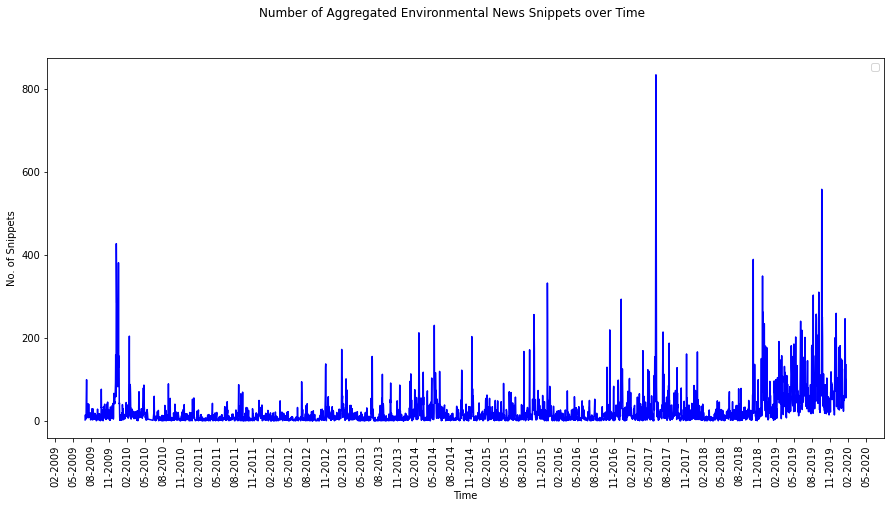

In [94]:
create_single_plot(x="MatchDateTime", y="snippets_no", df=groupby_time, xlabel="Time", ylabel="No. of Snippets", title="Number of Aggregated Environmental News Snippets over Time")